In [ ]:
#!pip install missingno

In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [3]:
ls crime_data_raw/2011

apr11.xls*  dec11.xls*  jan11.xls*  jun11.xls*  may11.xls*  oct11.xls*
aug11.xls*  feb11.xls*  jul11.xls*  mar11.xls*  nov11.xls*  sep11.xls*


In [4]:
path = 'crime_data_raw/2011'

In [5]:
ls crime_data_raw/

10years/    2006/  2009/  2012/  2015/  premise_codes.csv*
1985_2014/  2007/  2010/  2013/  2016/  Untitled Folder/
2005/       2008/  2011/  2014/  2017/


In [6]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [7]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [8]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 10 columns):
Date             127659 non-null datetime64[ns]
Hour             127659 non-null int64
Offense Type     127659 non-null object
Beat             127659 non-null object
Premise          127659 non-null object
Block Range      127659 non-null object
Street Name      127659 non-null object
Type             127659 non-null object
Suffix           127659 non-null object
# Of Offenses    127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [10]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10,19,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03,23,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17,23,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


In [11]:
# check if  null values
df.isnull().values.any().any()

False

In [12]:
# check su, of null values
df.isnull().values.sum()

0

In [13]:
len(df[df.isnull().any(axis=1)])

0

## Visualize our data

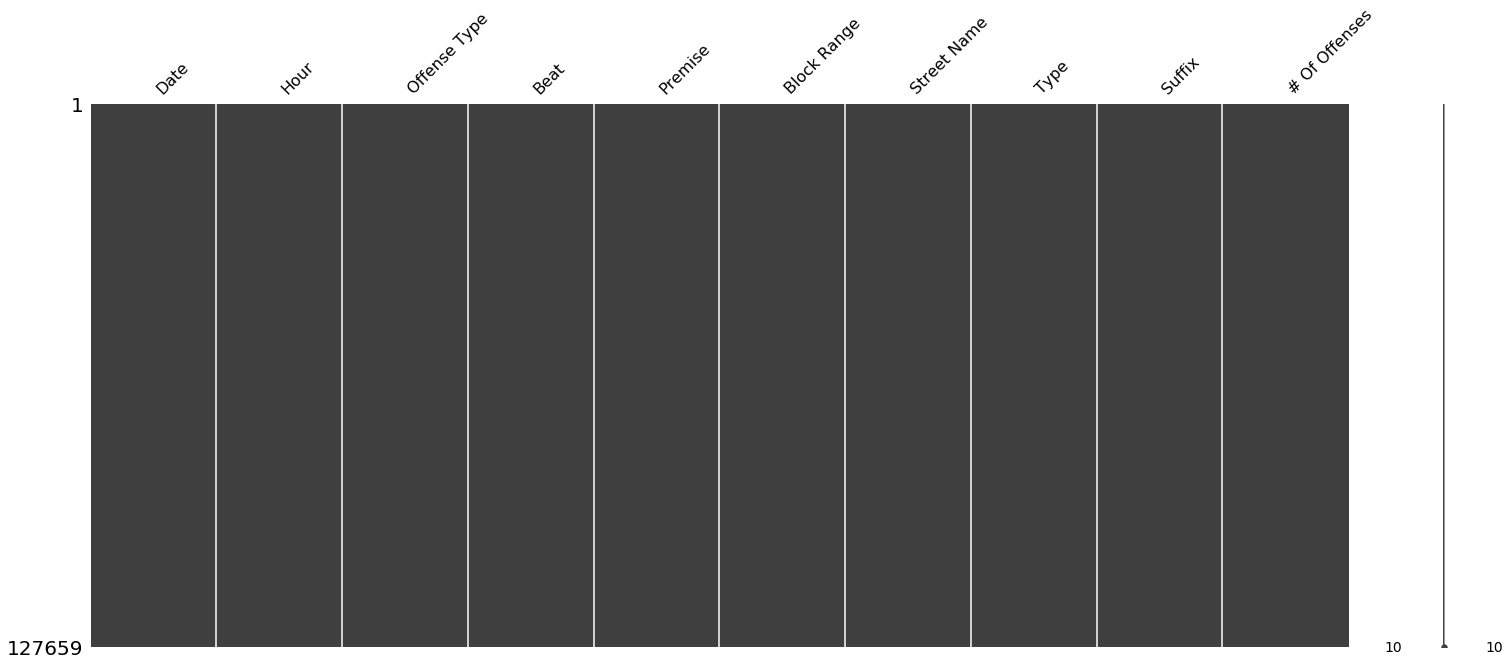

In [14]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [15]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2011-04-13,1,Murder,17E40,20A,6400-6499,BANKSIDE,DR,-,1
1,2011-04-06,14,Murder,20G30,20A,2900-2999,HAYES,RD,-,1
2,2011-01-10,19,Murder,13D20,20R,8400-8499,GLENSCOT,-,-,1
3,2011-04-03,23,Murder,19G50,18N,10700-10799,BELLFORT,ST,W,1
4,2011-04-17,23,Murder,11H20,20A,2500-2599,BROADWAY,ST,-,1


In [16]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 10 columns):
Date           127659 non-null datetime64[ns]
Hour           127659 non-null int64
OffenseType    127659 non-null object
Beat           127659 non-null object
Premise        127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
Type           127659 non-null object
Suffix         127659 non-null object
NumOffenses    127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


In [ ]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
#     'Block Range': 'BlockRange',
#     'Street Name': 'StreetName'
# }, inplace=True)
# df.info()

## Subset dataframe to work on 

In [17]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127659 entries, 0 to 127658
Data columns (total 8 columns):
Date           127659 non-null datetime64[ns]
Beat           127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
OffenseType    127659 non-null object
Premise        127659 non-null object
NumOffenses    127659 non-null int64
Hour           127659 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.8+ MB


## Find NaN
- drop if > 2 nan

In [18]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [19]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [ ]:
crimes = crimes.dropna(thresh=2)

In [20]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


## Joint dataframes

In [21]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127662 entries, 0 to 127661
Data columns (total 9 columns):
Date                   127659 non-null datetime64[ns]
Beat                   127659 non-null object
BlockRange             127659 non-null object
StreetName             127659 non-null object
OffenseType            127659 non-null object
Premise                127662 non-null object
NumOffenses            127659 non-null float64
Hour                   127659 non-null float64
Premise Description    127574 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 9.7+ MB


In [22]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2011-04-13,17E40,6400-6499,BANKSIDE,Murder,20A,1.0,1.0,APARTMENT
1,2011-04-06,20G30,2900-2999,HAYES,Murder,20A,1.0,14.0,APARTMENT
2,2011-04-17,11H20,2500-2599,BROADWAY,Murder,20A,1.0,23.0,APARTMENT
3,2011-04-21,17E10,5900-5999,BELLAIRE,Rape,20A,1.0,15.0,APARTMENT
4,2011-04-10,17E40,12500-12599,DUNLAP,Rape,20A,1.0,20.0,APARTMENT


## Visualize data

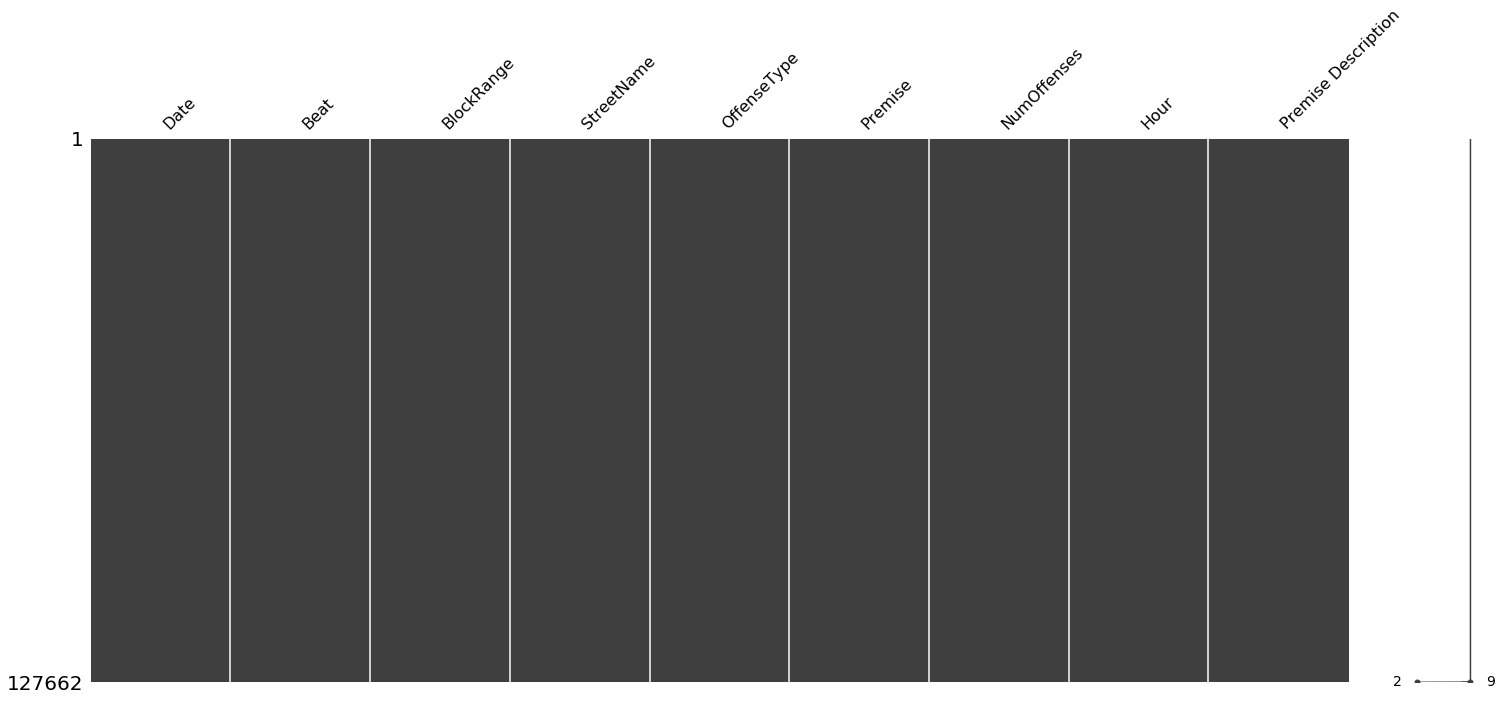

In [23]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [24]:
len(crimes[crimes.isnull().any(axis=1)])

91

In [25]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
126699,2011-04-20,19G10,10800-10899,BEECHNUT,Auto Theft,---,1.0,18.0,NaN
126700,2011-04-15,20G30,10400-10499,RICHMOND,Theft,---,1.0,11.0,NaN
126701,2011-05-07,1A10,1200-1299,TRAVIS,Rape,---,1.0,15.0,NaN
126702,2011-05-01,20G10,9900-9999,RICHMOND,Theft,---,1.0,0.0,NaN
126703,2011-08-15,19G10,6800-6899,WEST SAM HOUSTON,Theft,---,1.0,19.0,NaN
126704,2011-12-04,11H10,6800-6899,CANAL,Burglary,---,1.0,20.0,NaN
126705,2011-12-25,13D10,5000-5099,TELEPHONE,Burglary,---,1.0,1.0,NaN
126706,2011-11-27,5F30,6300-6399,ROTHWAY,Theft,---,1.0,17.0,NaN
126707,2011-12-05,10H80,2500-2599,DUNSTAN,Theft,---,1.0,19.0,NaN
126708,2011-12-04,3B10,11600-11699,NORTHWEST,Theft,---,1.0,14.0,NaN


## drop rows with 2 or 3 or more NaN

In [26]:
crimes = crimes.dropna(thresh=3)

In [27]:
len(crimes[crimes.isnull().any(axis=1)])

88

In [28]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
126699,2011-04-20,19G10,10800-10899,BEECHNUT,Auto Theft,---,1.0,18.0,NaN
126700,2011-04-15,20G30,10400-10499,RICHMOND,Theft,---,1.0,11.0,NaN
126701,2011-05-07,1A10,1200-1299,TRAVIS,Rape,---,1.0,15.0,NaN
126702,2011-05-01,20G10,9900-9999,RICHMOND,Theft,---,1.0,0.0,NaN
126703,2011-08-15,19G10,6800-6899,WEST SAM HOUSTON,Theft,---,1.0,19.0,NaN
126704,2011-12-04,11H10,6800-6899,CANAL,Burglary,---,1.0,20.0,NaN
126705,2011-12-25,13D10,5000-5099,TELEPHONE,Burglary,---,1.0,1.0,NaN
126706,2011-11-27,5F30,6300-6399,ROTHWAY,Theft,---,1.0,17.0,NaN
126707,2011-12-05,10H80,2500-2599,DUNSTAN,Theft,---,1.0,19.0,NaN
126708,2011-12-04,3B10,11600-11699,NORTHWEST,Theft,---,1.0,14.0,NaN


## Inspect each column

In [29]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat

In [30]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

121

In [31]:
crimes.Beat.value_counts(dropna=False).head()

19G10    3029
12D10    2761
6B60     2717
3B10     2578
13D20    2390
Name: Beat, dtype: int64

In [ ]:
#crimes.Beat.unique()

In [32]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [33]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

121

## BlockRange

In [34]:
len(crimes.BlockRange.value_counts(dropna=False))

254

In [35]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      1731
100-199      1638
800-899      1631
9400-9499    1603
700-799      1601
Name: BlockRange, dtype: int64

In [36]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [37]:
len(crimes.BlockRange.value_counts(dropna=False))

254

## StreetName

In [38]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7537


In [39]:
crimes.StreetName = crimes.StreetName.str.strip()

In [40]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7537


In [41]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3587
GESSNER       1846
GULF          1801
NORTH         1763
RICHMOND      1713
Name: StreetName, dtype: int64


## OffenseType

In [42]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [43]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [44]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [45]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 68596
Burglary              27459
Auto Theft            11893
Aggravated Assault    10695
Robbery                8054
Rape                    770
Murder                  192
Name: OffenseType, dtype: int64


## Premise

In [46]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:127


In [47]:
crimes.Premise = crimes.Premise.str.strip()

In [48]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:127


In [49]:
crimes.Premise.value_counts(dropna=False).head()

20A    17514
20R    17271
18A    13946
13R     8758
20D     7690
Name: Premise, dtype: int64

## Premise Description

In [50]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:124


In [51]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [52]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:124


In [53]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

APARTMENT                17514
RESIDENCE/HOUSE          17271
APARTMENT PARKING LOT    13946
ROAD/STREET/SIDEWALK      8758
DRIVEWAY                  7690
Name: Premise Description, dtype: int64


# Set Date as index

In [54]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [55]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1964-10-09,1A40,3700-3799,WESTHEIMER,Aggravated Assault,18O,1.0,5.0,OTHER PARKING LOT
1965-03-20,6B60,12400-12499,GREENSPOINT,Theft,09H,1.0,23.0,HOSPITAL
1966-10-27,6B50,10300-10399,NORTH,Theft,210,1.0,0.0,RESTAURANT/CAFETERIA
1970-11-27,19G50,10200-10299,LANDS END,Theft,250,1.0,13.0,OTHER/UNKNOWN
1971-08-16,14D20,9000-9099,BRANDON,Theft,20D,1.0,22.0,DRIVEWAY


## Create Columns with day,weekday,month,year from date index

In [56]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [57]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1964-10-09,1A40,3700-3799,WESTHEIMER,Aggravated Assault,18O,1.0,5.0,OTHER PARKING LOT,09,Friday,Oct,1964
1965-03-20,6B60,12400-12499,GREENSPOINT,Theft,09H,1.0,23.0,HOSPITAL,20,Saturday,Mar,1965
1966-10-27,6B50,10300-10399,NORTH,Theft,210,1.0,0.0,RESTAURANT/CAFETERIA,27,Thursday,Oct,1966
1970-11-27,19G50,10200-10299,LANDS END,Theft,250,1.0,13.0,OTHER/UNKNOWN,27,Friday,Nov,1970
1971-08-16,14D20,9000-9099,BRANDON,Theft,20D,1.0,22.0,DRIVEWAY,16,Monday,Aug,1971


## null values

- check
- count
- display

In [58]:
crimes.isnull().values.any().any()

True

In [59]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

88

In [60]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
2010-06-01,20G70,12700-12799,WHITTINGTON,Rape,---,1.0,12.0,NaN,01,Tuesday,Jun,2010
2010-12-03,14D20,7200-7299,PEERLESS,Aggravated Assault,---,1.0,22.0,NaN,03,Friday,Dec,2010
2011-01-04,1A30,1900-1999,PEDEN,Theft,---,1.0,0.0,NaN,04,Tuesday,Jan,2011
2011-01-18,12D10,9400-9499,SOUTH SAM HOUSTON,Theft,---,1.0,11.0,NaN,18,Tuesday,Jan,2011
2011-01-23,8C60,7000-7099,BRETSHIRE,Burglary,---,1.0,0.0,NaN,23,Sunday,Jan,2011
2011-01-23,8C60,7000-7099,BRETSHIRE,Burglary,---,1.0,0.0,NaN,23,Sunday,Jan,2011
2011-01-26,19G20,11300-11399,BELLAIRE,Burglary,---,1.0,19.0,NaN,26,Wednesday,Jan,2011
2011-01-31,1A10,1400-1499,CAROLINE,Auto Theft,---,1.0,20.0,NaN,31,Monday,Jan,2011
2011-02-02,5F10,2200-2299,WIRT,Rape,---,1.0,16.0,NaN,02,Wednesday,Feb,2011


In [61]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127659 entries, 1964-10-09 to 2011-12-31
Data columns (total 12 columns):
Beat                   127659 non-null object
BlockRange             127659 non-null object
StreetName             127659 non-null object
OffenseType            127659 non-null object
Premise                127659 non-null object
NumOffenses            127659 non-null float64
Hour                   127659 non-null float64
Premise Description    127571 non-null object
day                    127659 non-null object
weekday                127659 non-null object
month                  127659 non-null object
year                   127659 non-null object
dtypes: float64(2), object(10)
memory usage: 15.2+ MB


## New Dataframe
- remove premise col
- keep premise description

In [62]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1964-10-09,1A40,3700-3799,WESTHEIMER,Aggravated Assault,OTHER PARKING LOT,1.0,5.0,09,Friday,Oct,1964
1965-03-20,6B60,12400-12499,GREENSPOINT,Theft,HOSPITAL,1.0,23.0,20,Saturday,Mar,1965
1966-10-27,6B50,10300-10399,NORTH,Theft,RESTAURANT/CAFETERIA,1.0,0.0,27,Thursday,Oct,1966
1970-11-27,19G50,10200-10299,LANDS END,Theft,OTHER/UNKNOWN,1.0,13.0,27,Friday,Nov,1970
1971-08-16,14D20,9000-9099,BRANDON,Theft,DRIVEWAY,1.0,22.0,16,Monday,Aug,1971


In [63]:
crime_yr.isnull().values.any().any()

True

In [64]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

88

In [65]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2010-06-01,20G70,12700-12799,WHITTINGTON,Rape,NaN,1.0,12.0,01,Tuesday,Jun,2010
2010-12-03,14D20,7200-7299,PEERLESS,Aggravated Assault,NaN,1.0,22.0,03,Friday,Dec,2010
2011-01-04,1A30,1900-1999,PEDEN,Theft,NaN,1.0,0.0,04,Tuesday,Jan,2011
2011-01-18,12D10,9400-9499,SOUTH SAM HOUSTON,Theft,NaN,1.0,11.0,18,Tuesday,Jan,2011
2011-01-23,8C60,7000-7099,BRETSHIRE,Burglary,NaN,1.0,0.0,23,Sunday,Jan,2011
2011-01-23,8C60,7000-7099,BRETSHIRE,Burglary,NaN,1.0,0.0,23,Sunday,Jan,2011
2011-01-26,19G20,11300-11399,BELLAIRE,Burglary,NaN,1.0,19.0,26,Wednesday,Jan,2011
2011-01-31,1A10,1400-1499,CAROLINE,Auto Theft,NaN,1.0,20.0,31,Monday,Jan,2011
2011-02-02,5F10,2200-2299,WIRT,Rape,NaN,1.0,16.0,02,Wednesday,Feb,2011


## Drop rows with 2 or more NaN values

In [ ]:
#crime_yr = crime_yr.dropna(thresh=2)

In [ ]:
# display any null


#len(crime_yr[crime_yr.isnull().any(axis=1)])

In [ ]:
#crime_yr[crime_yr.isnull().any(axis=1)]

## replace nan
- replace nan with no labels

In [66]:
crime_yr = crime_yr.replace(np.nan, 'No label')

In [67]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [68]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [72]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127659 entries, 1964-10-09 to 2011-12-31
Data columns (total 11 columns):
Beat           127659 non-null object
BlockRange     127659 non-null object
StreetName     127659 non-null object
OffenseType    127659 non-null object
Premise        127659 non-null object
NumOffenses    127659 non-null float64
Hour           127659 non-null float64
day            127659 non-null object
weekday        127659 non-null object
month          127659 non-null object
year           127659 non-null object
dtypes: float64(2), object(9)
memory usage: 11.7+ MB


In [74]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1964-10-09,1A40,3700-3799,WESTHEIMER,Aggravated Assault,OTHER PARKING LOT,1.0,5.0,09,Friday,Oct,1964
1965-03-20,6B60,12400-12499,GREENSPOINT,Theft,HOSPITAL,1.0,23.0,20,Saturday,Mar,1965
1966-10-27,6B50,10300-10399,NORTH,Theft,RESTAURANT/CAFETERIA,1.0,0.0,27,Thursday,Oct,1966
1970-11-27,19G50,10200-10299,LANDS END,Theft,OTHER/UNKNOWN,1.0,13.0,27,Friday,Nov,1970
1971-08-16,14D20,9000-9099,BRANDON,Theft,DRIVEWAY,1.0,22.0,16,Monday,Aug,1971


In [75]:
ls crime_data_clean/new

crime10_clean.csv*


In [76]:
crime_yr.to_csv('crime_data_clean/new/crime11_clean.csv')

In [77]:
ls crime_data_clean/new

crime10_clean.csv*  crime11_clean.csv*
